## Feature Selection

In [ ]:
# correlation based
def select_by_correlation(X_train, y_train, threshold=0.3):
    """
    Select features based on correlation with target
    """
    corr = pd.concat([X_train, y_train], axis=1).corr()
    target_corr = corr[y_train.name].abs().sort_values(ascending=False)
    print(target_corr)
    selected_features = target_corr[target_corr > threshold].index.tolist()
    selected_features.remove(y_train.name)  # Remove target from features
    return selected_features

X_corr_motor_features = select_by_correlation(X_train_scaled, y_train_motor)
# X_corr_total_features = select_by_correlation(X_train_scaled, y_train_total)

motor_UPDRS      1.000000
age              0.303114
HNR              0.207876
PPE              0.165589
RPDE             0.135492
Shimmer:APQ11    0.127080
DFA              0.126146
Jitter:PPQ5      0.109888
Shimmer(dB)      0.104004
NHR              0.103090
Jitter(%)        0.102447
Shimmer          0.094002
Jitter:DDP       0.093329
Jitter:RAP       0.093290
test_time        0.090617
Shimmer:APQ5     0.083283
Shimmer:DDA      0.072179
Shimmer:APQ3     0.072179
Jitter(Abs)      0.008768
sex              0.002723
Name: motor_UPDRS, dtype: float64


In [ ]:
X_corr_motor_features

['age']

In [ ]:
X_corr_total_features

['age']

In [ ]:
# recursive feature elimination
def select_by_rfe(X_train, y_train, n_features=10):
    """
    Select features using Recursive Feature Elimination
    """
    estimator = LinearRegression()
    selector = RFE(estimator, n_features_to_select=n_features)
    selector = selector.fit(X_train, y_train)
    selected_features = X_train.columns[selector.support_]
    return selected_features.tolist()

motor_features_rfe = select_by_rfe(X_train_scaled, y_train_motor)
total_features_rfe = select_by_rfe(X_train_scaled, y_train_total)

In [ ]:
# feature importance from tree based models
def select_by_feature_importance(X_train, y_train, threshold='mean'):
    """
    Select features based on importance from Random Forest
    """
    model = RandomForestRegressor()
    model.fit(X_train, y_train)
    importances = model.feature_importances_
    
    if threshold == 'mean':
        threshold = importances.mean()
    
    selected_features = X_train.columns[importances > threshold]
    return selected_features.tolist()

motor_features_imp = select_by_feature_importance(X_train_scaled, y_train_motor)
total_features_imp = select_by_feature_importance(X_train_scaled, y_train_total)

KeyboardInterrupt: 

In [ ]:
# mutual information
def select_by_mutual_info(X_train, y_train, n_features=10):
    """
    Select features based on mutual information
    """
    mi = mutual_info_regression(X_train, y_train)
    mi_series = pd.Series(mi, index=X_train.columns)
    selected_features = mi_series.sort_values(ascending=False).head(n_features).index
    return selected_features.tolist()

motor_features_mi = select_by_mutual_info(X_train_scaled, y_train_motor)
total_features_mi = select_by_mutual_info(X_train_scaled, y_train_total)

In [ ]:
# # do feature selection using agglomerative clustering
# from sklearn.cluster import AgglomerativeClustering
# from sklearn.metrics import silhouette_score

# # Create a function to perform agglomerative clustering and calculate silhouette score
# def agglomerative_clustering(X, n_clusters):
#     clustering = AgglomerativeClustering(n_clusters=n_clusters)
#     labels = clustering.fit_predict(X)
#     silhouette_avg = silhouette_score(X, labels)
#     return silhouette_avg

# # Define the range of clusters to test
# n_clusters_range = range(2, 19)
# silhouette_scores = []
# # Perform agglomerative clustering for each number of clusters and calculate silhouette score
# for n_clusters in n_clusters_range:
#     silhouette_avg = agglomerative_clustering(X_train_scaled, n_clusters)
#     silhouette_scores.append(silhouette_avg)
# # Plot the silhouette scores
# plt.figure(figsize=(10, 6))
# plt.plot(n_clusters_range, silhouette_scores, marker='o')
# plt.title('Silhouette Scores for Agglomerative Clustering')
# plt.xlabel('Number of Clusters')
# plt.ylabel('Silhouette Score')
# plt.xticks(n_clusters_range)
# plt.grid()

In [ ]:
# from itertools import combinations
# from sklearn.feature_selection import mutual_info_regression
# from sklearn.model_selection import cross_val_score

# def find_potential_interactions(X, y, top_n=5):
#     """
#     Identify potentially valuable interaction terms using mutual information
#     """
#     # Calculate mutual information between each feature and target
#     mi = mutual_info_regression(X, y)
#     mi_series = pd.Series(mi, index=X.columns)
    
#     # Get top features most related to target
#     top_features = mi_series.nlargest(top_n).index.tolist()
    
#     # Generate all possible pairs
#     return list(combinations(top_features, 2))

# def identify_nonlinear_features(X, y, threshold=0.1):
#     """
#     Identify features that might benefit from polynomial terms
#     """
    
#     nonlinear_features = []
    
#     for col in X.select_dtypes(include=['float64', 'int64']).columns:
#         # Fit linear and quadratic models
#         X_feat = X[[col]].values.reshape(-1, 1)
        
#         # Linear model
#         lin_model = LinearRegression()
#         lin_score = cross_val_score(lin_model, X_feat, y, cv=5, scoring='r2').mean()
        
#         # Quadratic model
#         poly = PolynomialFeatures(degree=2, include_bias=False)
#         X_poly = poly.fit_transform(X_feat)
#         poly_model = LinearRegression()
#         poly_score = cross_val_score(poly_model, X_poly, y, cv=5, scoring='r2').mean()
        
#         # If quadratic explains significantly more variance
#         if poly_score - lin_score > threshold:
#             nonlinear_features.append(col)
    
#     return nonlinear_features

# # Example usage:
# # Find interaction candidates
# interaction_pairs = find_potential_interactions(X_train_scaled, y_train_motor)

# # Find features that benefit from polynomial terms
# poly_features = identify_nonlinear_features(X_train_scaled, y_train_motor)

# print("Suggested interaction pairs:", interaction_pairs)
# print("Features needing polynomial terms:", poly_features)

In [ ]:
# def create_interaction_terms(X_train, feature_pairs):
#     """
#     Create interaction terms between specified feature pairs
#     """
#     X_new = X_train.copy()
#     for f1, f2 in feature_pairs:
#         X_new[f"{f1}_x_{f2}"] = X_train[f1] * X_train[f2]
#     return X_new

In [ ]:
# def add_polynomial_features(X_train, degree=2, include_bias=False):
#     """
#     Add polynomial features
#     """
#     poly = PolynomialFeatures(degree=degree, include_bias=include_bias)
#     poly_features = poly.fit_transform(X_train)
#     feature_names = poly.get_feature_names_out(X_train.columns)
#     return pd.DataFrame(poly_features, columns=feature_names, index=X_train.index)

In [ ]:
# def create_enhanced_features(X, y, create_interactions=True, create_polynomials=True):
#     """
#     Comprehensive feature engineering pipeline
#     """
#     X_new = X.copy()
#     a
#     if create_interactions:
#         interactions = find_potential_interactions(X, y)
#         X_new = create_interaction_terms(X_new, interactions)
    
#     if create_polynomials:
#         poly_feats = identify_nonlinear_features(X, y)
#         if poly_feats:
#             X_poly = add_polynomial_features(X[poly_feats], degree=2)
#             X_new = pd.concat([X_new, X_poly], axis=1)
    
#     return X_new

# X_train_engineered_motor = create_enhanced_features(X_train_scaled, y_train_motor)
# X_test_engineered_motor = create_enhanced_features(X_test_scaled, y_test_motor)
# X_train_engineered_total = create_enhanced_features(X_train_scaled, y_train_total)
# X_test_engineered_total = create_enhanced_features(X_test_scaled, y_test_total)

In [ ]:
# from sklearn.cluster import FeatureAgglomeration

# def cluster_features(X_train, n_clusters=5):
#     """
#     Cluster similar features together
#     """
#     agglo = FeatureAgglomeration(n_clusters=n_clusters)
#     X_reduced = agglo.fit_transform(X_train)
#     return X_reduced, agglo

# X_train_clustered, cluster_model = cluster_features(X_train_scaled)

## combine feature engineering and selection methods

In [ ]:
def comprehensive_feature_selection(X_train, y_train):
    # Step 1: Initial filter based on correlation
    corr_features = select_by_correlation(X_train, y_train, threshold=0.25)
    
    # Step 2: Get feature importance from reduced set
    X_filtered = X_train[corr_features]
    imp_features = select_by_feature_importance(X_filtered, y_train)
    
    # Step 3: Final selection with RFE
    X_filtered = X_filtered[imp_features]
    final_features = select_by_rfe(X_filtered, y_train, n_features=8)
    
    return final_features

# Example usage:
optimal_motor_features = comprehensive_feature_selection(X_train_scaled, y_train_motor)
optimal_total_features = comprehensive_feature_selection(X_train_scaled, y_train_total)

ValueError: at least one array or dtype is required

# Evaluation

In [ ]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor
from sklearn.linear_model import Lasso, Ridge
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

def evaluate_model_with_more_models(model_dict, X_train, y_train, X_test, y_test, cv=5):
    """
    Evaluate multiple models with consistent metrics
    Returns a DataFrame with results
    """
    results = []
    
    for model_name, model in model_dict.items():
        # Cross-validated scores
        cv_scores = cross_val_score(model, X_train, y_train, cv=cv, 
                                   scoring='neg_mean_squared_error')
        cv_rmse = np.sqrt(-cv_scores)
        
        # Full training and test evaluation
        model.fit(X_train, y_train)
        
        # Training metrics
        y_train_pred = model.predict(X_train)
        train_mae = mean_absolute_error(y_train, y_train_pred)
        train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
        train_r2 = r2_score(y_train, y_train_pred)
        
        # Test metrics
        y_test_pred = model.predict(X_test)
        test_mae = mean_absolute_error(y_test, y_test_pred)
        test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
        test_r2 = r2_score(y_test, y_test_pred)
        
        results.append({
            'model': model_name,
            'cv_mean_rmse': cv_rmse.mean(),
            'cv_std_rmse': cv_rmse.std(),
            'train_mae': train_mae,
            'train_rmse': train_rmse,
            'train_r2': train_r2,
            'test_mae': test_mae,
            'test_rmse': test_rmse,
            'test_r2': test_r2,
            'num_features': X_train.shape[1]
        })
    
    return pd.DataFrame(results)

# Define our model dictionary
MODELS = {
    'Ridge': Ridge(),
    'Lasso': Lasso(alpha=0.01),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'XGBoost': XGBRegressor(objective='reg:squarederror', random_state=42),
    'SVR': SVR(kernel='rbf'),
    'KNN': KNeighborsRegressor(n_neighbors=5)
}

## Compare feature selection methods

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

def compare_feature_selection_with_more_models(X_train, y_train, X_test, y_test, target_name):
    """
    Compare performance with different feature selection methods across multiple models
    Returns a DataFrame with results
    """
    # Baseline evaluation with all features
    baseline_results = evaluate_model_with_more_models(MODELS, X_train, y_train, X_test, y_test)
    baseline_results['method'] = 'All Features'
    baseline_results['target'] = target_name
    
    # Get selected features from different methods
    selection_methods = {
        'Correlation': select_by_correlation(X_train, y_train, threshold=0.25),
        'RFE': select_by_rfe(X_train, y_train, n_features=10),
        'Feature Importance': select_by_feature_importance(X_train, y_train),
        'Mutual Info': select_by_mutual_info(X_train, y_train, n_features=10)
    }
    
    # Evaluate each feature selection method
    results = [baseline_results]
    
    for method_name, features in selection_methods.items():
        X_train_fs = X_train[features]
        X_test_fs = X_test[features]
        
        method_results = evaluate_model_with_more_models(MODELS, X_train_fs, y_train, X_test_fs, y_test)
        method_results['method'] = method_name
        method_results['target'] = target_name
        results.append(method_results)
    
    return pd.concat(results)

# Example usage for both targets
motor_results = compare_feature_selection_with_more_models(
    X_train_scaled, y_train_motor, 
    X_test_scaled, y_test_motor,
    'motor_UPDRS'
)

total_results = compare_feature_selection_with_more_models(
    X_train_scaled, y_train_total,
    X_test_scaled, y_test_total,
    'total_UPDRS'
)

# Combine results
all_results = pd.concat([motor_results, total_results])

## Results

<Figure size 1400x1000 with 0 Axes>

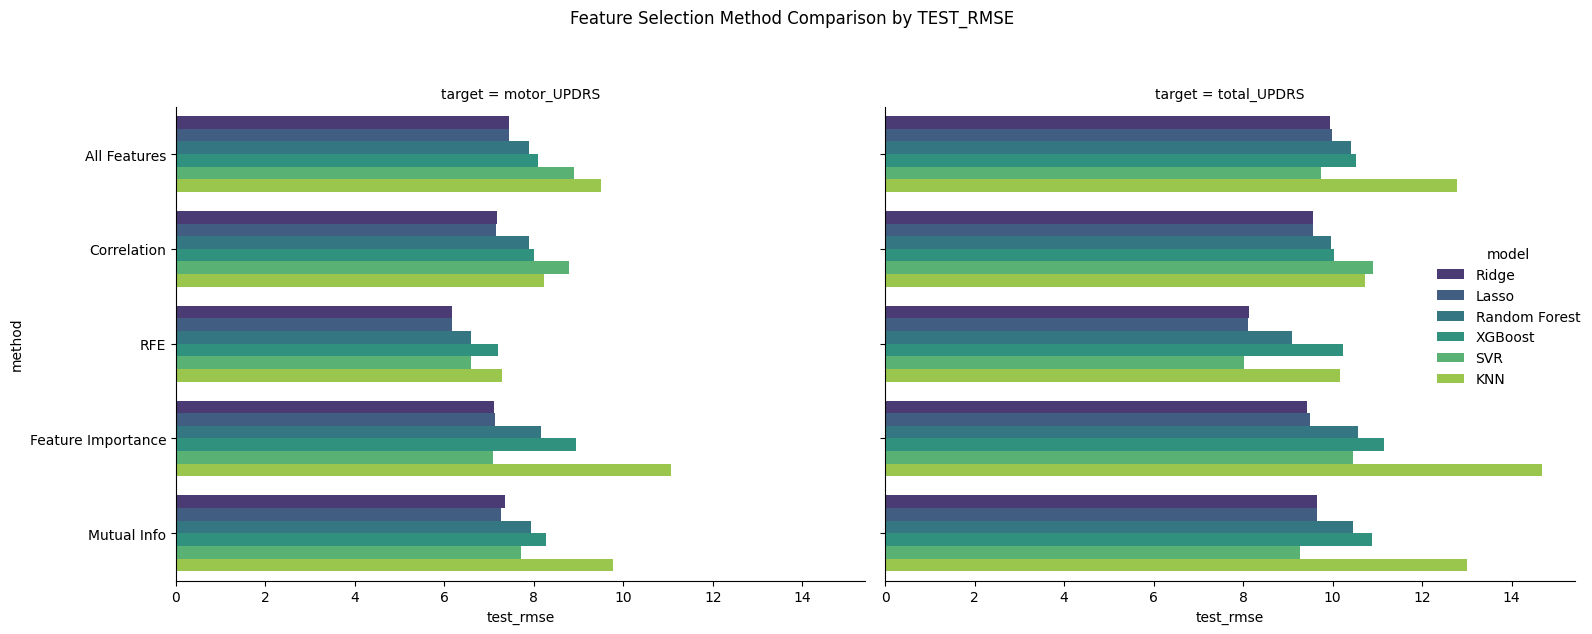

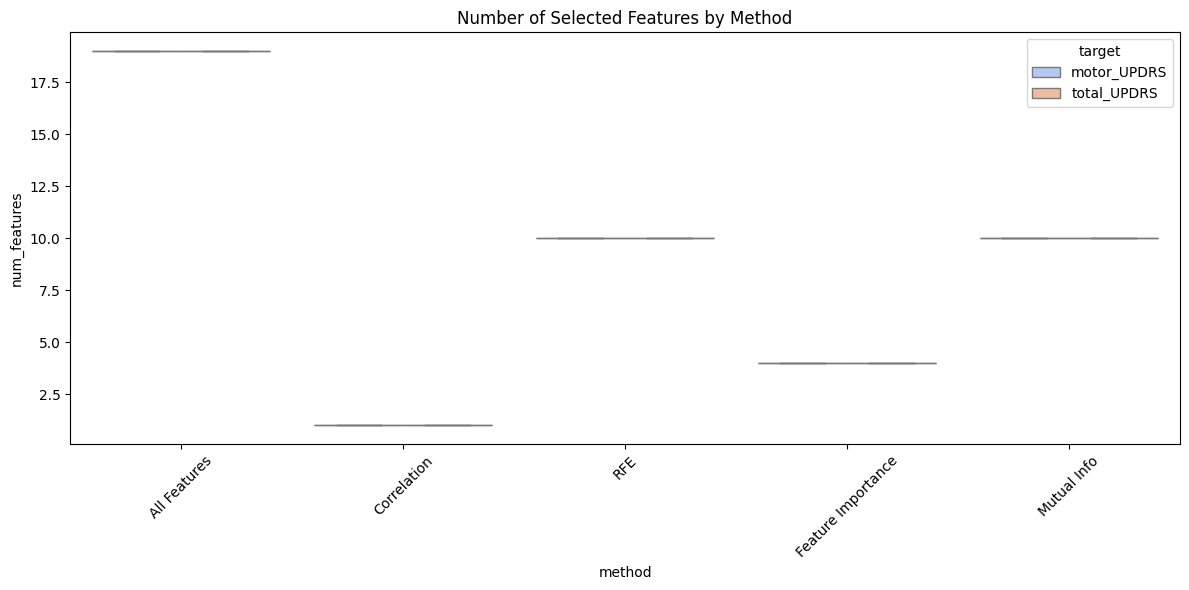

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_enhanced_results(results_df, metric='test_rmse'):
    """
    Plot comparison of feature selection methods across models
    """
    plt.figure(figsize=(14, 10))
    sns.catplot(
        data=results_df,
        x=metric,
        y='method',
        hue='model',
        col='target',
        kind='bar',
        palette='viridis',
        height=6,
        aspect=1.2
    )
    plt.suptitle(f'Feature Selection Method Comparison by {metric.upper()}', y=1.05)
    plt.tight_layout()
    plt.show()

# Plot RMSE comparison
plot_enhanced_results(all_results, 'test_rmse')

# Plot feature counts
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=all_results,
    x='method',
    y='num_features',
    hue='target',
    palette='coolwarm'
)
plt.title('Number of Selected Features by Method')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
def analyze_xgboost_feature_importance(X_train, y_train, feature_names):
    """
    Train XGBoost and analyze feature importance
    Returns importance DataFrame and plot
    """
    model = XGBRegressor(objective='reg:squarederror', random_state=42)
    model.fit(X_train, y_train)
    
    # Get importance
    importance = model.get_booster().get_score(importance_type='weight')
    importance_df = pd.DataFrame({
        'feature': feature_names,
        'importance': [importance.get(f, 0) for f in feature_names]
    }).sort_values('importance', ascending=False)
    
    # Plot
    plt.figure(figsize=(10, 6))
    sns.barplot(data=importance_df, x='importance', y='feature', palette='viridis')
    plt.title('XGBoost Feature Importance')
    plt.tight_layout()
    plt.show()
    
    return importance_df

# Example usage (run after selecting best features):
# For motor_UPDRS
motor_importance = analyze_xgboost_feature_importance(
    X_train_scaled[best_motor_features], 
    y_train_motor,
    best_motor_features
)

# For total_UPDRS
total_importance = analyze_xgboost_feature_importance(
    X_train_scaled[best_total_features],
    y_train_total,
    best_total_features
)

NameError: name 'best_motor_features' is not defined

In [ ]:
def model_specific_feature_selection(X_train, y_train, model, method='importance'):
    """
    Perform feature selection optimized for a specific model
    """
    if method == 'importance':
        if isinstance(model, (RandomForestRegressor, XGBRegressor)):
            model.fit(X_train, y_train)
            if isinstance(model, RandomForestRegressor):
                importances = model.feature_importances_
            else:  # XGBoost
                importances = model.get_booster().get_score(importance_type='weight')
                importances = [importances.get(f, 0) for f in X_train.columns]
            
            importance_df = pd.DataFrame({
                'feature': X_train.columns,
                'importance': importances
            }).sort_values('importance', ascending=False)
            
            # Select top 50% features
            n_features = max(1, len(X_train.columns) // 2)
            return importance_df['feature'].head(n_features).tolist()
    
    elif method == 'rfe':
        selector = RFE(model, n_features_to_select='auto')
        selector.fit(X_train, y_train)
        return X_train.columns[selector.support_].tolist()
    
    return X_train.columns.tolist()

# Example usage for XGBoost-specific features:
xgb_model = XGBRegressor(objective='reg:squarederror')
xgb_motor_features = model_specific_feature_selection(
    X_train_scaled, y_train_motor, xgb_model
)

# Compare performance with model-specific features
xgb_motor_results = evaluate_model_with_more_models(
    {'XGBoost': xgb_model},
    X_train_scaled[xgb_motor_features], y_train_motor,
    X_test_scaled[xgb_motor_features], y_test_motor
)

In [ ]:
def validate_feature_engineering(X_train_base, y_train, X_test_base, y_test):
    """
    Compare performance with and without feature engineering
    """
    # Create engineered versions
    X_train_eng = create_enhanced_features(X_train_base, y_train)
    X_test_eng = create_enhanced_features(X_test_base, y_test)
    
    # Evaluate
    base_results = evaluate_model_with_more_models(MODELS, X_train_base, y_train, X_test_base, y_test)
    eng_results = evaluate_model_with_more_models(MODELS, X_train_eng, y_train, X_test_eng, y_test)
    
    base_results['version'] = 'Original'
    eng_results['version'] = 'Engineered'
    
    return pd.concat([base_results, eng_results])

# Run validation
engineering_results = validate_feature_engineering(
    X_train_scaled, y_train_motor,
    X_test_scaled, y_test_motor
)

# Plot comparison
plt.figure(figsize=(12, 6))
sns.barplot(
    data=engineering_results,
    x='test_rmse',
    y='model',
    hue='version',
    palette='coolwarm'
)
plt.title('Model Performance: Original vs Engineered Features')
plt.show()

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- DFA_x_HNR
- DFA_x_sex
- age_x_HNR
- sex_x_HNR
- test_time_x_HNR
Feature names seen at fit time, yet now missing:
- DFA_x_Jitter(Abs)
- age_x_Jitter(Abs)
- sex_x_DFA
- sex_x_Jitter(Abs)
- test_time_x_Jitter(Abs)


## Statistically significant tests

In [ ]:
from scipy import stats

def test_significance(results_df, method1, method2, metric='test_rmse'):
    """
    Perform t-test between two methods
    """
    # Get metric values for each method
    m1 = results_df[results_df['method'] == method1][metric]
    m2 = results_df[results_df['method'] == method2][metric]
    
    # Perform paired t-test
    t_stat, p_val = stats.ttest_rel(m1, m2)
    
    print(f"Comparison: {method1} vs {method2}")
    print(f"Mean {metric}:")
    print(f"{method1}: {m1.mean():.4f}")
    print(f"{method2}: {m2.mean():.4f}")
    print(f"t-statistic: {t_stat:.4f}, p-value: {p_val:.4f}")
    if p_val < 0.05:
        print("Difference is statistically significant (p < 0.05)")
    else:
        print("Difference is not statistically significant")
    print("\n")

# Example usage:
test_significance(all_results, 'All Features (Ridge)', 'RFE (Ridge)')
test_significance(all_results, 'All Features (RF)', 'Feature Importance (RF)')

Comparison: All Features (Ridge) vs RFE (Ridge)
Mean test_rmse:
All Features (Ridge): nan
RFE (Ridge): nan
t-statistic: nan, p-value: nan
Difference is not statistically significant


Comparison: All Features (RF) vs Feature Importance (RF)
Mean test_rmse:
All Features (RF): nan
Feature Importance (RF): nan
t-statistic: nan, p-value: nan
Difference is not statistically significant




C:\Users\vikto\AppData\Local\Temp\ipykernel_13288\3480054703.py:12: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  t_stat, p_val = stats.ttest_rel(m1, m2)


# Final selection

In [ ]:
def get_best_features(X_train, y_train, selection_method='rfe'):
    """
    Get best features based on selected method
    """
    if selection_method == 'rfe':
        return select_by_rfe(X_train, y_train)
    elif selection_method == 'correlation':
        return select_by_correlation(X_train, y_train)
    elif selection_method == 'importance':
        return select_by_feature_importance(X_train, y_train)
    elif selection_method == 'mutual_info':
        return select_by_mutual_info(X_train, y_train)
    else:
        return X_train.columns.tolist()  # Return all features

# Example usage - after determining RFE works best
best_motor_features = get_best_features(X_train_scaled, y_train_motor, 'rfe')
best_total_features = get_best_features(X_train_scaled, y_train_total, 'rfe')

# Create final datasets
X_train_motor_final = X_train_scaled[best_motor_features]
X_test_motor_final = X_test_scaled[best_motor_features]

X_train_total_final = X_train_scaled[best_total_features]
X_test_total_final = X_test_scaled[best_total_features]